# OpenCV 기하학적 변환 실습


## 학습 목표
1. 다양한 필터 적용하기
2. 이미지 회전, 확대, 축소 마스터하기
3. Affine 변환으로 이미지 왜곡하기
4. Perspective 변환으로 원근감 표현하기
5. 실전 문제 해결하기

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Dejavu Sans' # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 설청

In [7]:
cv2.LINE_AA

16

In [8]:
cv2.FONT_HERSHEY_SIMPLEX

0

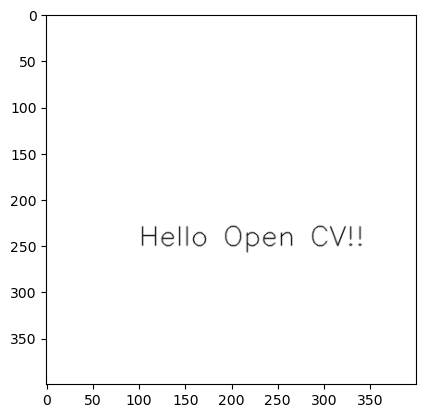

In [16]:
image_bg = np.ones((400,400,3), dtype=np.uint8) * 255
cv2.putText(image_bg,'Hello Open CV!!', (100,250),0,1,(0,0,0),1,16)
plt.imshow(image_bg)

In [28]:
def create_sample_image():
    image_bg = np.ones((400,400,3), dtype=np.uint8) * 255

    cv2.rectangle(image_bg, (50,50), (150,150),(255,0,0),-1) # 파란색 사각형

    cv2.circle(image_bg, (300,100), 50,(0,255,0),-1) # 초록색 원

    triangle_pts = np.array([[200,250],[150,350],[250,350]],dtype=np.int32)
    cv2.fillPoly(image_bg,[triangle_pts],(0,0,255)) # 빨간색 삼각형

    cv2.putText(image_bg,
                'Hello Open CV!!',
                (100,250),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0,0,0),
                2,
                cv2.LINE_AA)

    return image_bg

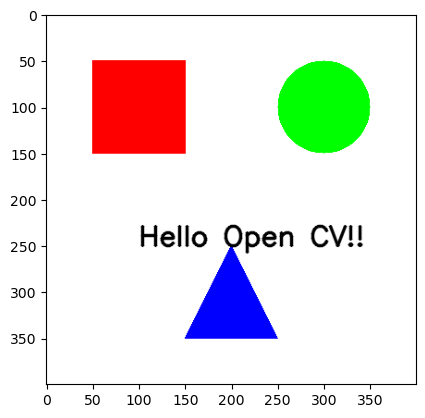

In [29]:
sample_img = create_sample_image()
plt.imshow(sample_img)

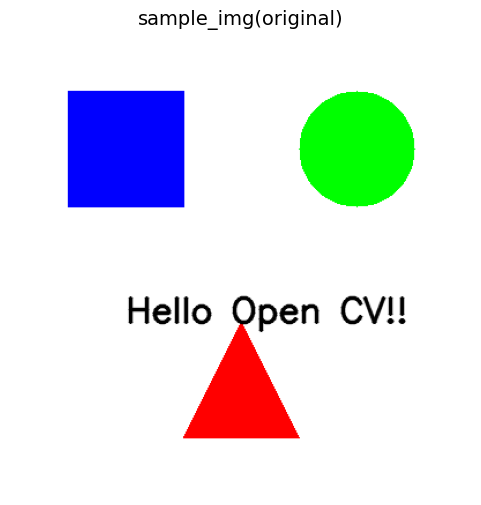

In [30]:
sample_img_rgb = cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(sample_img_rgb)
plt.title('sample_img(original)', fontsize=14)
plt.axis('off')
plt.show()

In [23]:
sample_img.shape

(400, 400, 3)

In [48]:
# 필터링

blur_avg = cv2.blur(
    sample_img_rgb,
    (11,11)
)

blur_gaussian = cv2.GaussianBlur(
    sample_img_rgb,
    (11,11),
    0 # 시그마 (0은 자동계산)
)

blur_median = cv2.medianBlur(
    sample_img_rgb,
    11
)

blur_bilateral = cv2.bilateralFilter(
    sample_img_rgb,
    15, # 픽셀 이웃 직경 
    80, # 색상 공간의 표준편차 (클수록 더 많은 색상 표현 가능)
    80  # 좌표 공간의 표준편차 (클수록 더 넓은 영역 고려)
)

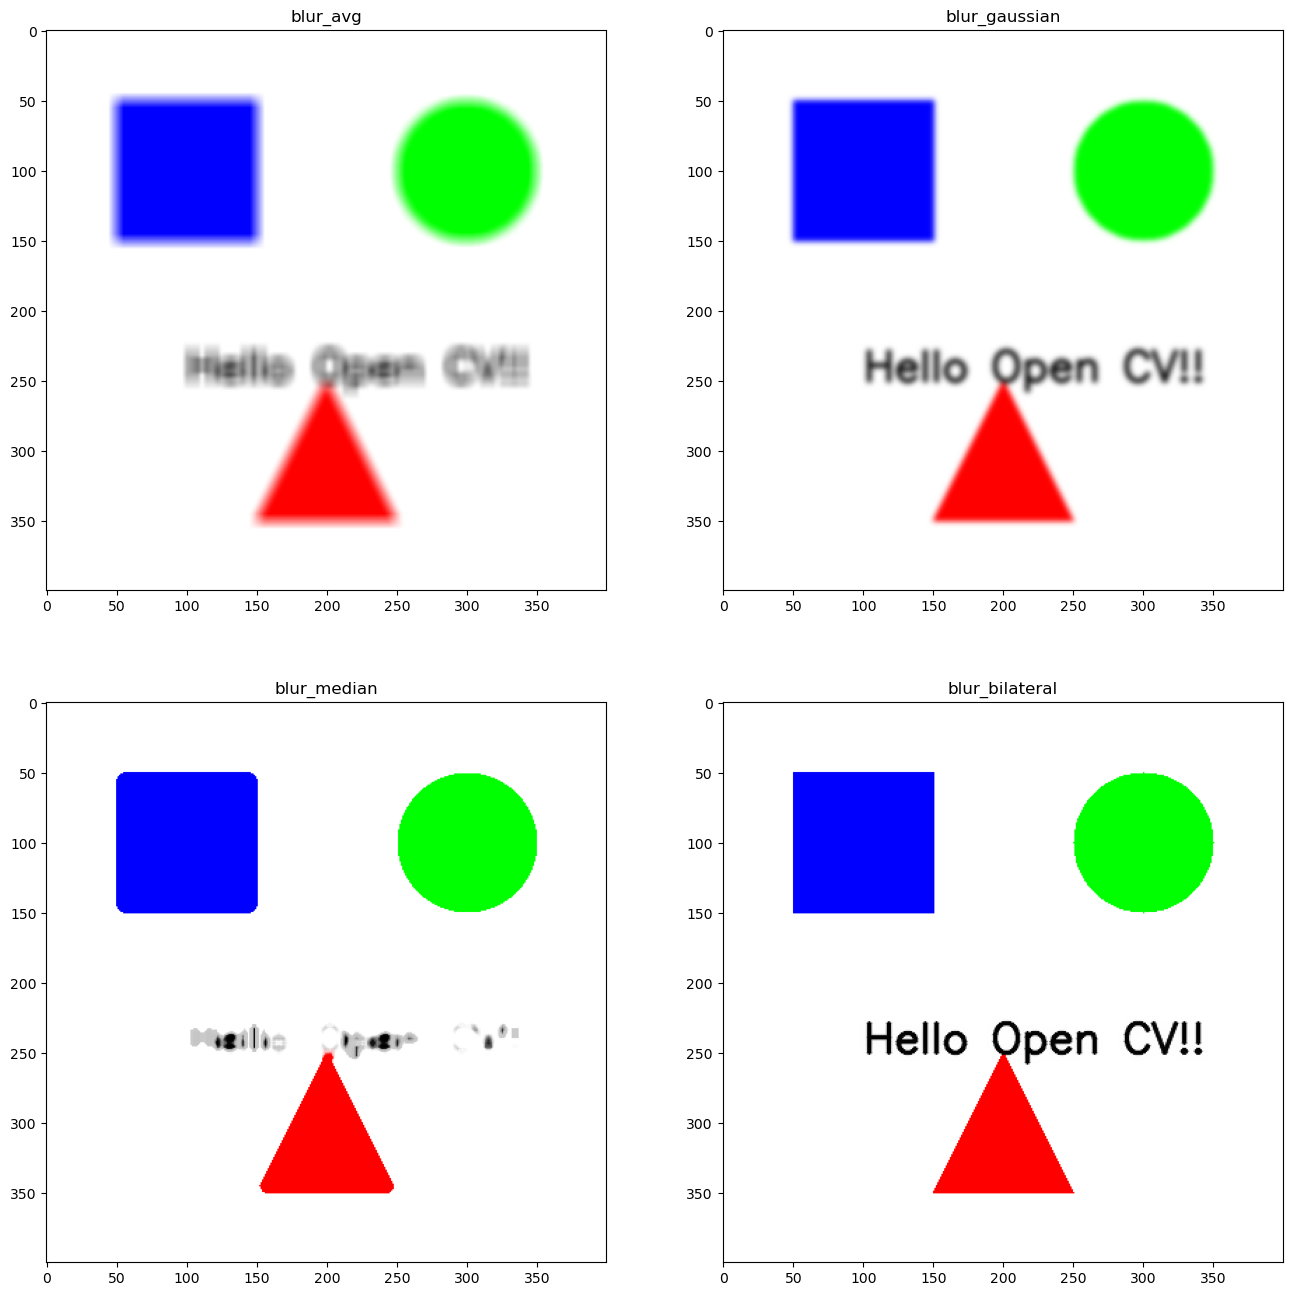

In [49]:
fig, axes = plt.subplots(2,2,figsize = (16,16))
axes[0,0].set_title('blur_avg')
axes[0,0].imshow(blur_avg)
axes[0,1].set_title('blur_gaussian')
axes[0,1].imshow(blur_gaussian)
axes[1,0].set_title('blur_median')
axes[1,0].imshow(blur_median)
axes[1,1].set_title('blur_bilateral')
axes[1,1].imshow(blur_bilateral)
plt.show()

In [52]:
list(axes.flat)

[<Axes: title={'center': 'Average Blur'}>,
 <Axes: title={'center': 'Gaussian Blur'}>,
 <Axes: title={'center': 'Median Blur'}>,
 <Axes: title={'center': 'Bilateral Filter'}>]

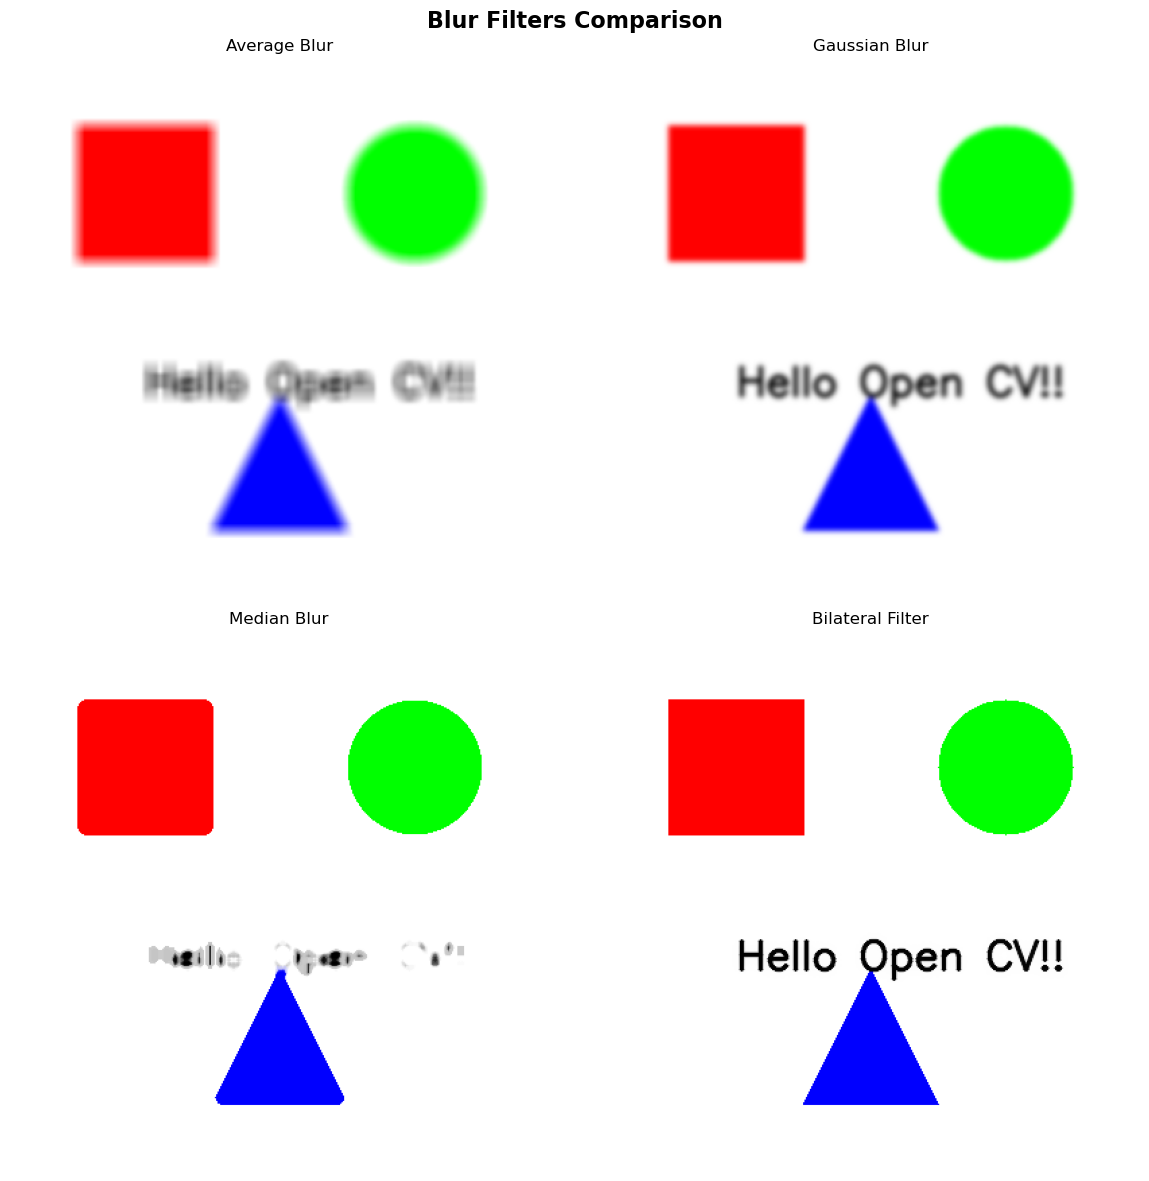

In [50]:
# 4개의 결과를 2x2 그리드로 표시
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열 서브플롯 생성
fig.suptitle('Blur Filters Comparison', fontsize=16, fontweight='bold')  # 전체 제목


# 각 필터 결과를 RGB로 변환하여 표시
images = [blur_avg, blur_gaussian, blur_median, blur_bilateral]  # 이미지 리스트
titles = ['Average Blur', 'Gaussian Blur', 'Median Blur', 'Bilateral Filter']  # 제목 리스트


for idx, (ax, img, title) in enumerate(zip(axes.flat, images, titles)):
    # axes.flat : 이미지가 그려질 위치(grid 에서 )
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR >> RGB
    ax.imshow(img_rgb)  # 이미지 표시
    ax.set_title(title, fontsize=12)  # 제목 설정
    ax.axis('off')  # 축 숨기기


plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()  # 화면에 표시


In [81]:
sobel_x = cv2.Sobel(
    sample_img_rgb,
    cv2.CV_64F, # 출력 이미지 타입 지정(64비트 float)
    1, # x방향 미분 차수 (1=1차 미분)
    0, # y방향 미분 차수 (0=0차 미분)
    ksize=3 # 커널 사이즈
)


In [97]:
# 엣지 검출

# 소벨 필터: 가로/세로 방향 엣지 검출
# 경계선 찾아주는 필터 (이미지에서 밝기값이 얼마나 급격하게 변했는지 즉 기울기 계산함)

sobel_x = cv2.Sobel(
    sample_img_rgb,
    cv2.CV_64F, # 출력 이미지 타입 지정(64비트 float)
    1, # x방향 미분 차수 (1=1차 미분)
    0, # y방향 미분 차수 (0=0차 미분)
    ksize=3 # 커널 사이즈
)

# sobel_x = np.uint8(sobel_x)

sobel_y = cv2.Sobel(
    sample_img_rgb,
    cv2.CV_64F, # 출력 이미지 타입 지정(64비트 float)
    0, # x방향 미분 차수 (0=0차 미분)
    1, # y방향 미분 차수 (1=1차 미분)
    ksize=3 # 커널 사이즈
)
sobel_combined2 = cv2.magnitude(sobel_x, sobel_y) # 거리 계산(피타고라스) # 타입이 실수여야함
sobel_combined2 = np.uint8(sobel_combined2)
sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))
sobel_combined = cv2.addWeighted(sobel_x,0.5,
                                 sobel_y,0.5,
                                 0) # 0.5*sobel_x + 0.5*sobel_y + 0




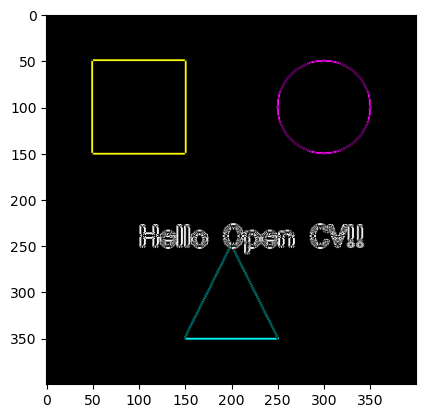

In [98]:
plt.imshow(sobel_combined2)

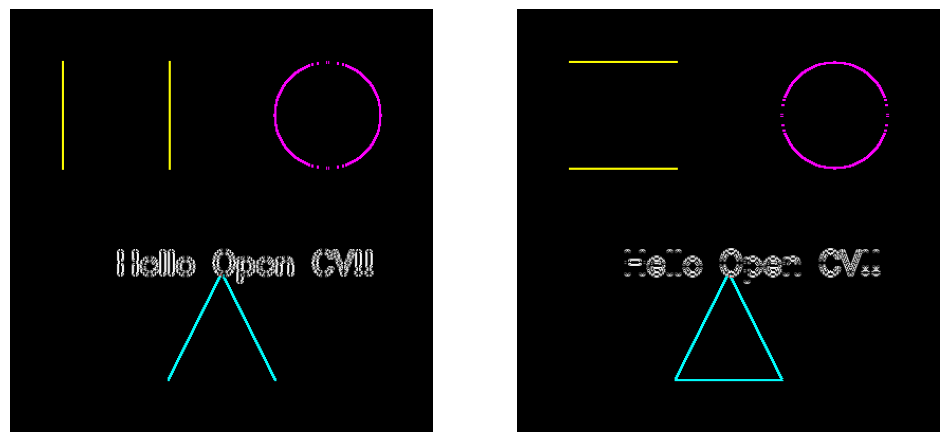

In [99]:
fig, axes = plt.subplots(1,2,figsize=(12,24))
axes[0].imshow(sobel_x)
axes[0].axis('off')
axes[1].imshow(sobel_y)
axes[1].axis('off')
plt.show()

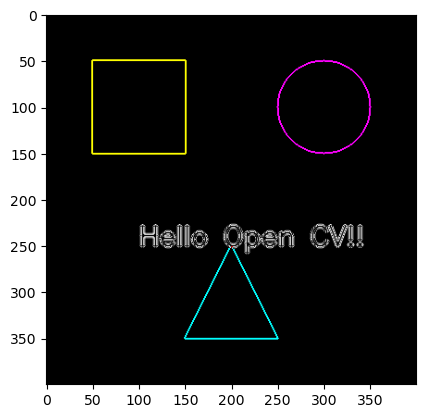

In [100]:
laplacian = cv2.Laplacian(
    sample_img_rgb,
    cv2.CV_64F,
)
laplacian = np.uint8(np.absolute(laplacian))
plt.imshow(laplacian)

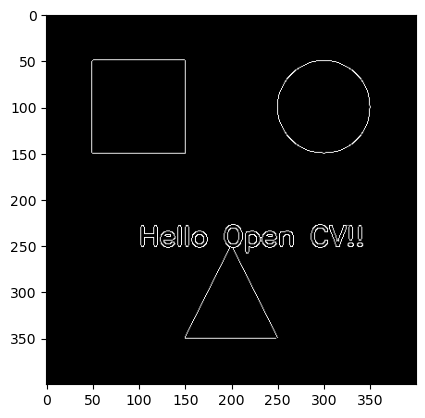

In [101]:
# 캐니
sample_img_gray = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(sample_img_gray, # 1채널(gray)만 가능
          50, # 최소임계값: 50 이하면 무조건 제외
          150) # 최대임계값: 무조건 포함 # 만약에 이 사이면 엣지에 연결되어 있으면 엣지 아니면 지움

plt.imshow(canny,cmap='gray')


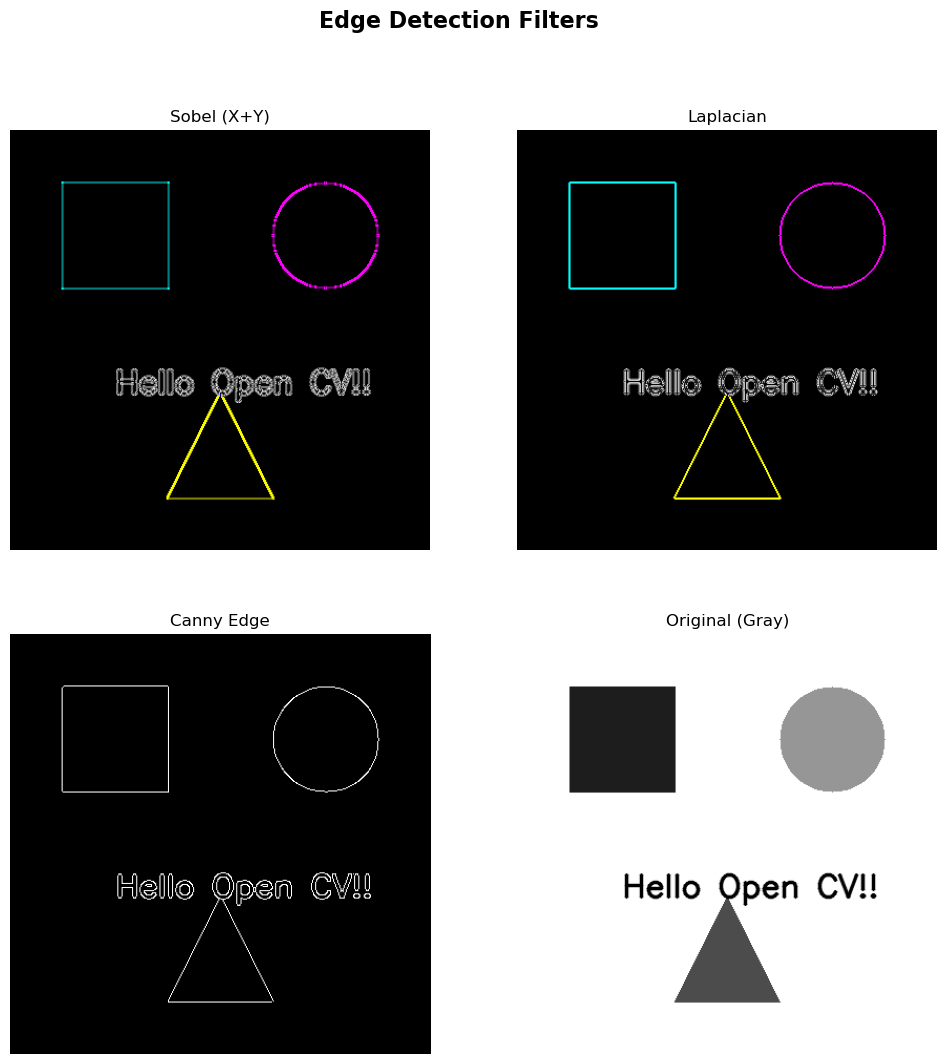

In [103]:
# 4개의 결과를 2x2 그리드로 표시
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열 서브플롯
fig.suptitle('Edge Detection Filters', fontsize=16, fontweight='bold')  # 전체 제목


# 결과 표시
edge_images = [sobel_combined, laplacian, canny, sample_img_gray]  # 이미지 리스트
edge_titles = ['Sobel (X+Y)', 'Laplacian', 'Canny Edge', 'Original (Gray)']  # 제목 리스트


for idx, (ax, img, title) in enumerate(zip(axes.flat, edge_images, edge_titles)):
    # 캐니와 그레이는 이미 흑백이므로 cmap='gray' 사용
    if idx >= 2:  # 캐니와 원본 그레이
        ax.imshow(img, cmap='gray')  # 흑백으로 표시
    else:  # 소벨과 라플라시안
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
        ax.imshow(img_rgb)  # 컬러로 표시


    ax.set_title(title, fontsize=12)  # 제목 설정
    ax.axis('off')  # 축 숨기기

In [133]:
height, width = sample_img_rgb.shape[:2]

center = (200, 200)

In [134]:
matrix45 = cv2.getRotationMatrix2D(center, # 회전 중심점
                                 45, # 회전 각도(반시계+)
                                 1) # 스케일
matrix45

matrix90 = cv2.getRotationMatrix2D(center, # 회전 중심점
                                 90, # 회전 각도(반시계+)
                                 1) # 스케일
matrix90

array([[ 6.12323400e-17,  1.00000000e+00, -2.84217094e-14],
       [-1.00000000e+00,  6.12323400e-17,  4.00000000e+02]])

In [135]:
matrix45_half = cv2.getRotationMatrix2D(center, # 회전 중심점
                                 45, # 회전 각도(반시계+)
                                 0.5) # 스케일
matrix30_large = cv2.getRotationMatrix2D(center, # 회전 중심점
                                 30, # 회전 각도(반시계+)
                                 1.5) # 스케일

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

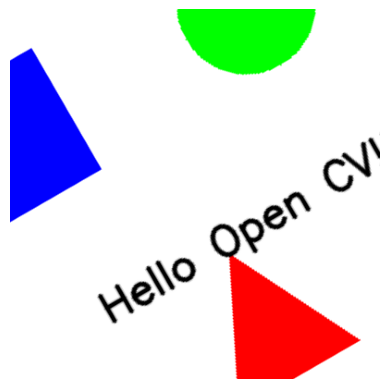

In [136]:
rotate = cv2.warpAffine(sample_img_rgb,
                        matrix30_large,
                        (height,width),
                        )
plt.imshow(rotate)
plt.axis('off')

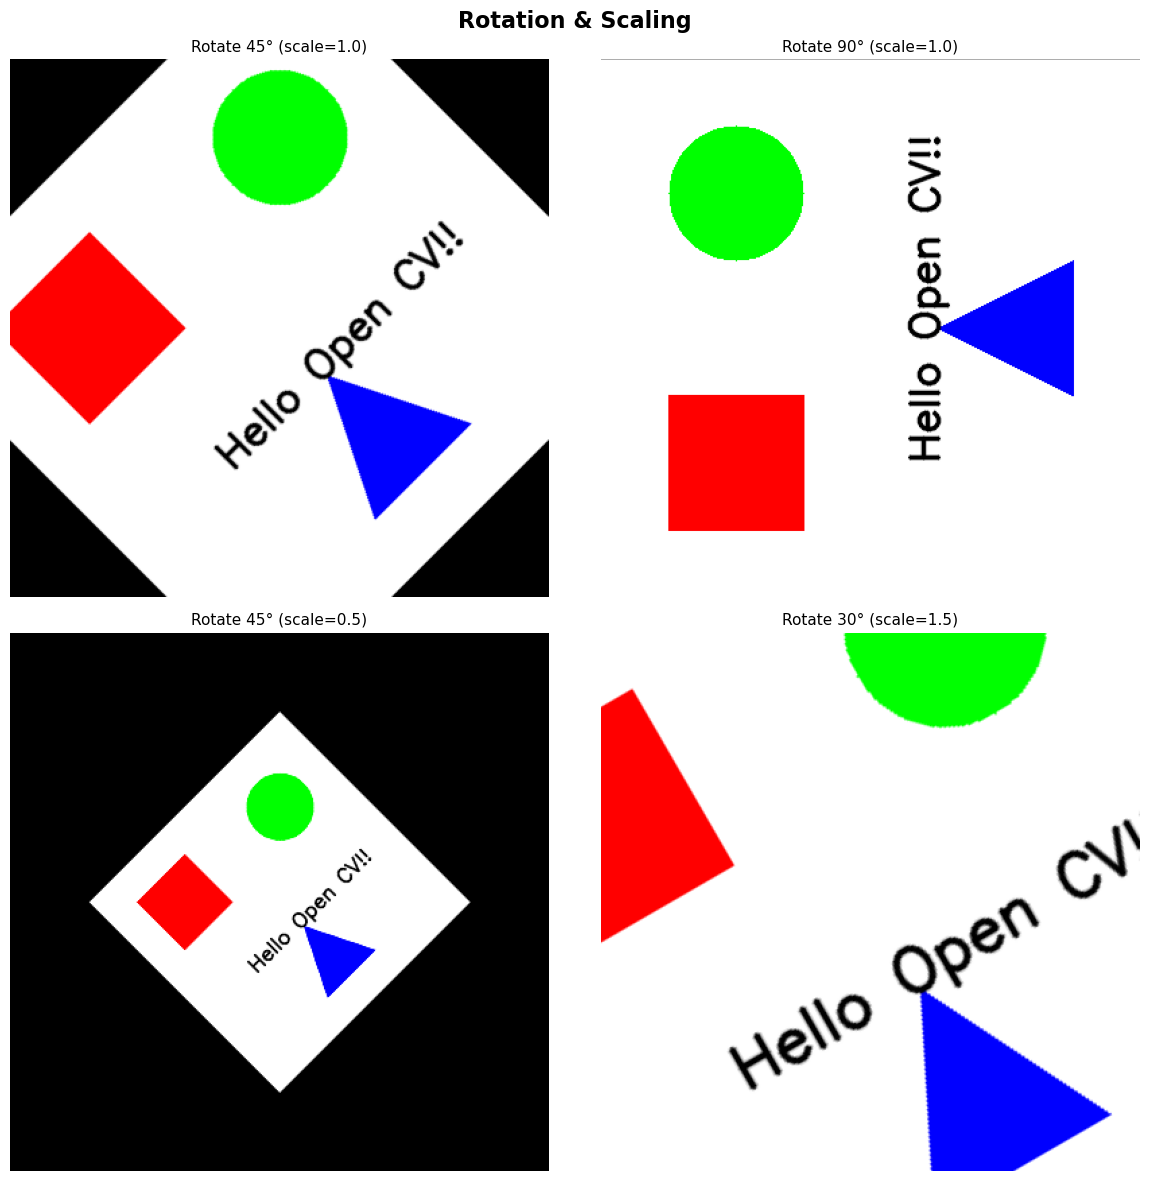

In [137]:
# 결과를 2x2 그리드로 표시
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열 서브플롯
fig.suptitle('Rotation & Scaling', fontsize=16, fontweight='bold')  # 전체 제목


# 회전 결과들
rotation_images = [matrix45, matrix90, matrix45_half, matrix30_large]  # 이미지 리스트
rotation_titles = [
    'Rotate 45° (scale=1.0)',  # 45도 회전
    'Rotate 90° (scale=1.0)',  # 90도 회전
    'Rotate 45° (scale=0.5)',  # 45도 회전 + 축소
    'Rotate 30° (scale=1.5)'   # 30도 회전 + 확대
]


# 각 subplot에 이미지 표시
for ax, mat, title in zip(axes.flat, rotation_images, rotation_titles):
    img = cv2.warpAffine(sample_img_rgb, mat, (height,width))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
    ax.imshow(img_rgb)  # 이미지 표시
    ax.set_title(title, fontsize=11)  # 제목 설정
    ax.axis('off')  # 축 숨기기


plt.tight_layout()  # 레이아웃 자동 조정
plt.show()  # 화면에 표시


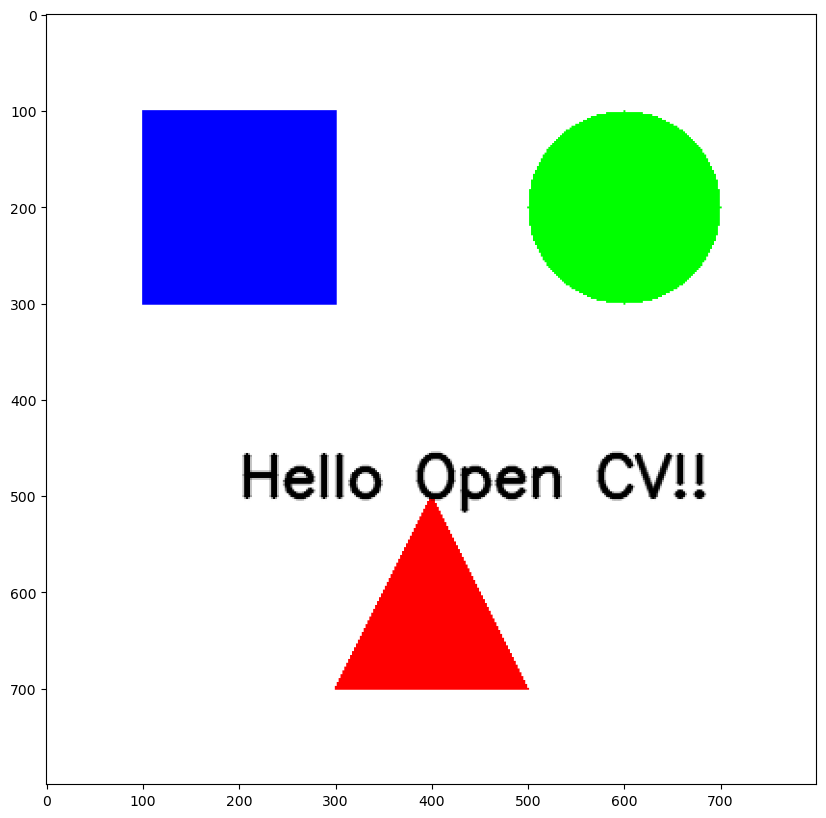

In [146]:
# 보간법
# 원본 이미지 2배 확대

# 1) INTER_NEAREST
# 최근접 이웃 셀 값을 복사 (가장 빠름, 품질 낮음, 계단 현상)

resized_nearest = cv2.resize(
    sample_img_rgb,
    (width*2,height*2),
    interpolation=cv2.INTER_NEAREST
)

plt.figure(figsize=(10,10))
plt.imshow(resized_nearest)

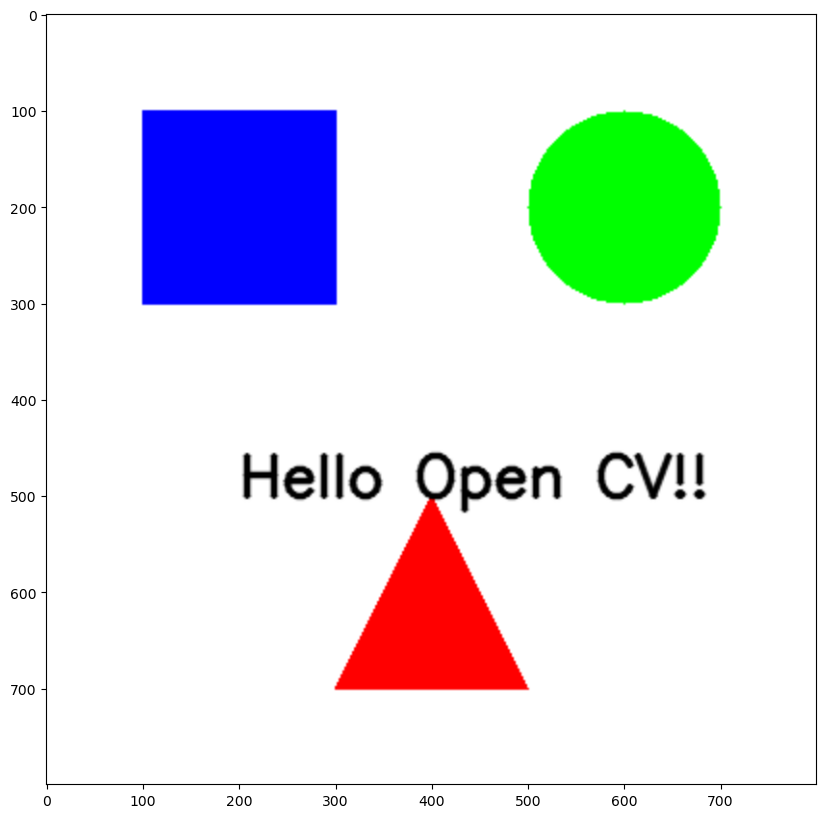

In [147]:
# 2) INTER_LINEAR
# 기본값(default) 적당한 속도와 품질

resized_linear = cv2.resize(
    sample_img_rgb,
    (width*2,height*2),
    interpolation=cv2.INTER_LINEAR
)
plt.figure(figsize=(10,10))
plt.imshow(resized_linear)

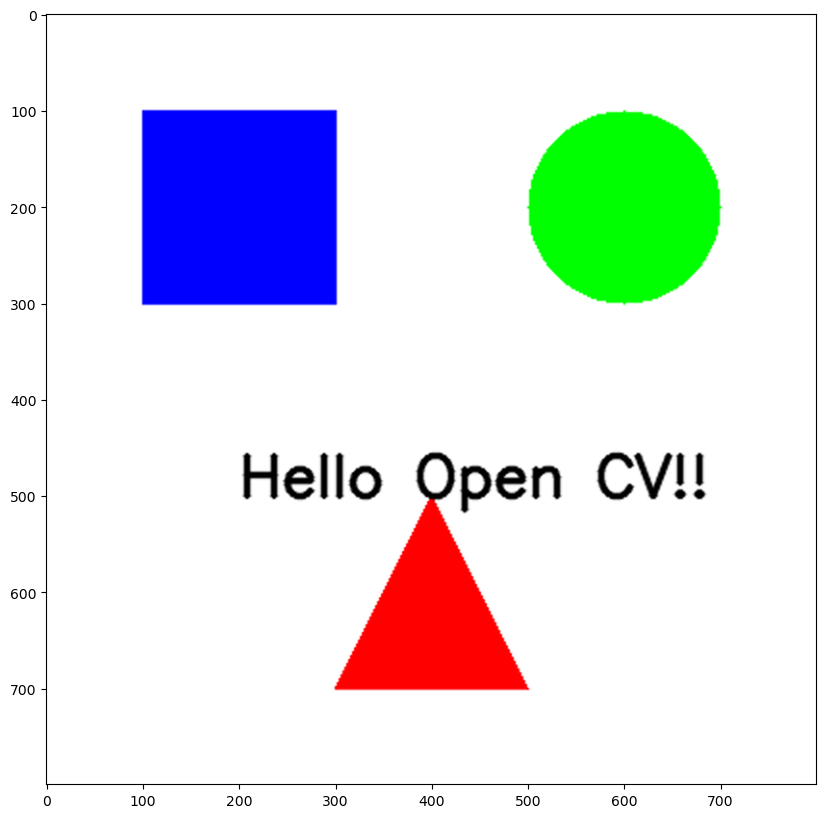

In [148]:
# 3) INTER_CUBIC
# 4*4 고품질, 약간 느림
resized_cubic = cv2.resize(
    sample_img_rgb,
    (width*2,height*2),
    interpolation=cv2.INTER_CUBIC
)
plt.figure(figsize=(10,10))
plt.imshow(resized_cubic)

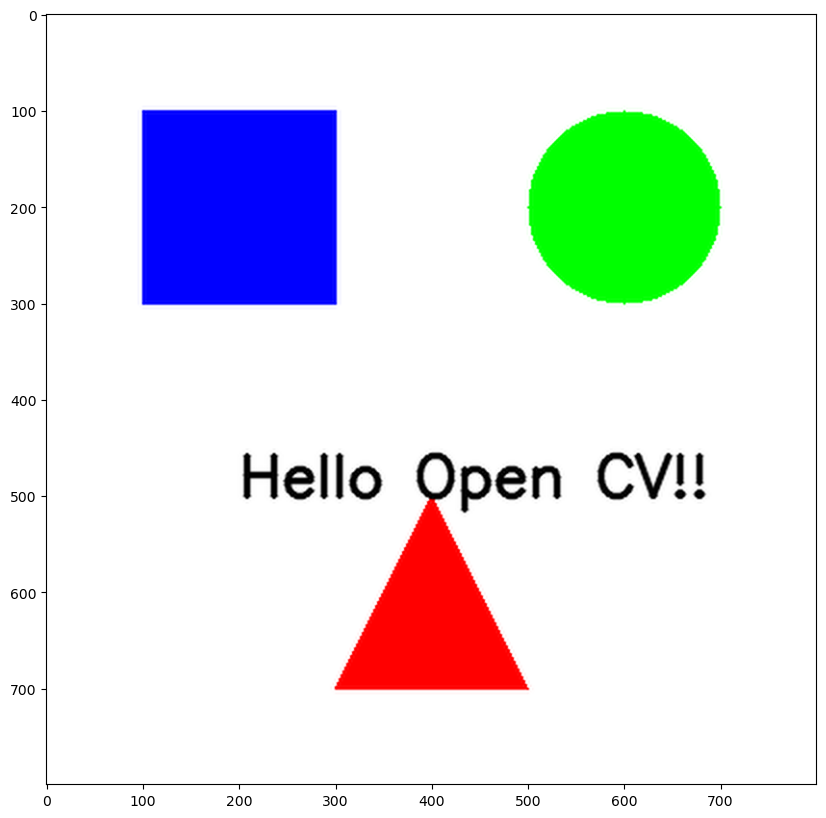

In [149]:
# 4) INTER_LANCZOS4
# 8*8 고품질, 매우 느림

resized_lanczos4 = cv2.resize(
    sample_img_rgb,
    (width*2,height*2),
    interpolation=cv2.INTER_LANCZOS4
)
plt.figure(figsize=(10,10))
plt.imshow(resized_lanczos4)

In [150]:
crop_y, crop_x = 280,280
crop_size = 80

cropped_images = np.array([resized_nearest, resized_linear, resized_cubic, resized_lanczos4])[:,crop_y:crop_y+crop_size,crop_x:crop_x+crop_size]

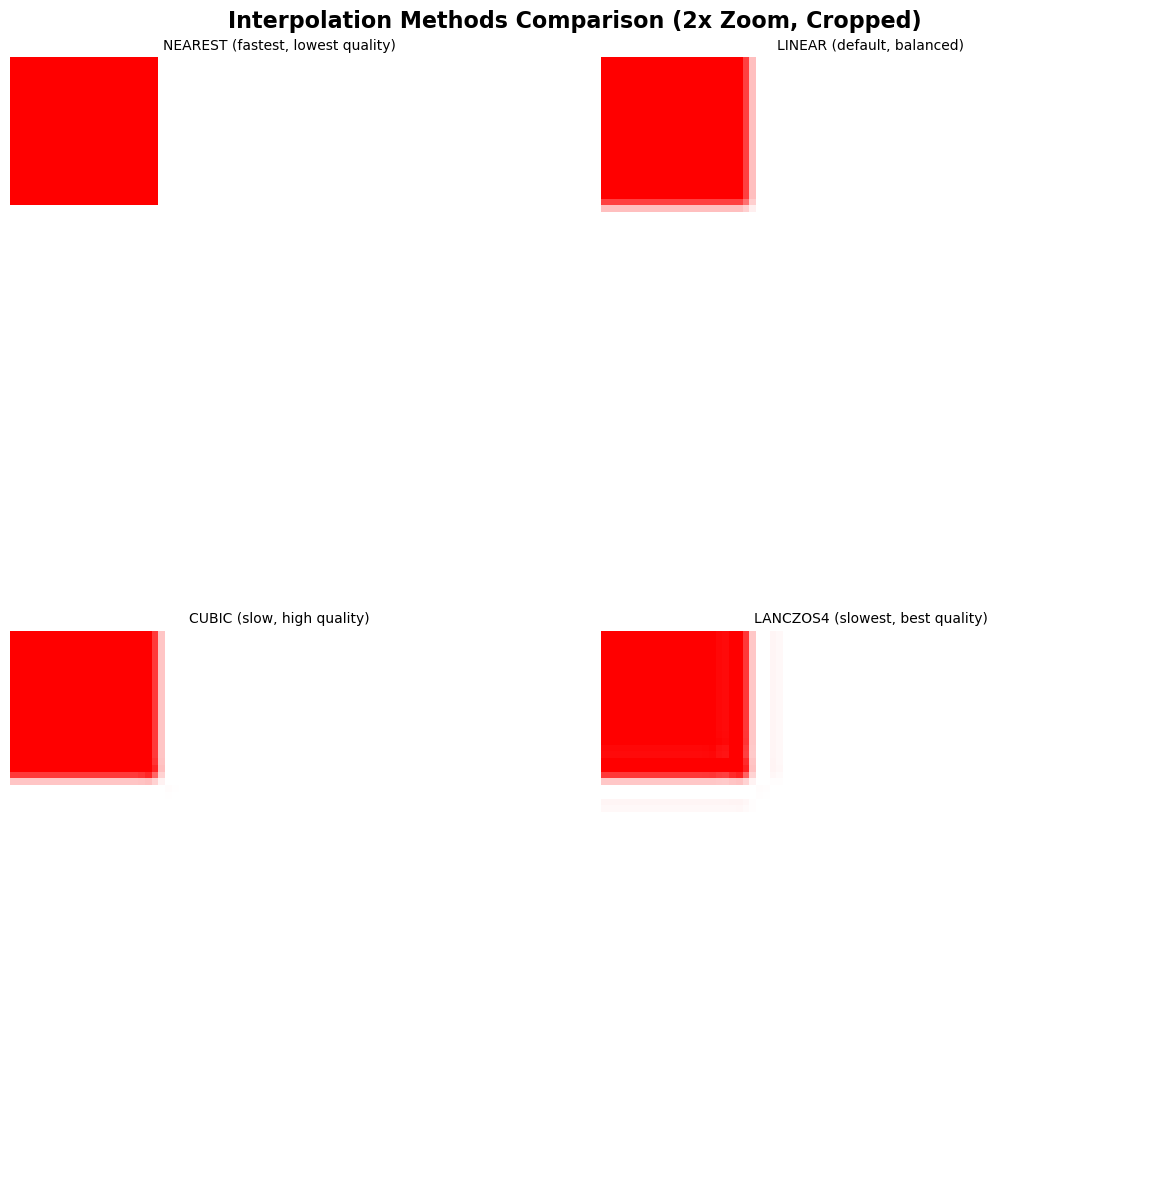

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열 서브플롯
fig.suptitle('Interpolation Methods Comparison (2x Zoom, Cropped)',
             fontsize=16, fontweight='bold')  # 전체 제목


# 확대 결과들 (일부 영역만)
interp_images = np.array([resized_nearest, resized_linear, resized_cubic, resized_lanczos4])[:,crop_y:crop_y+crop_size,crop_x:crop_x+crop_size]
interp_titles = [
    'NEAREST (fastest, lowest quality)',  # 가장 빠름
    'LINEAR (default, balanced)',  # 기본값
    'CUBIC (slow, high quality)',  # 고품질
    'LANCZOS4 (slowest, best quality)'  # 최고품질
]


# 각 subplot에 이미지 표시
for ax, img, title in zip(axes.flat, interp_images, interp_titles):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
    ax.imshow(img_rgb)  # 이미지 표시
    ax.set_title(title, fontsize=10)  # 제목 설정
    ax.axis('off')  # 축 숨기기


plt.tight_layout()  # 레이아웃 자동 조정
plt.show()  # 화면에 표시


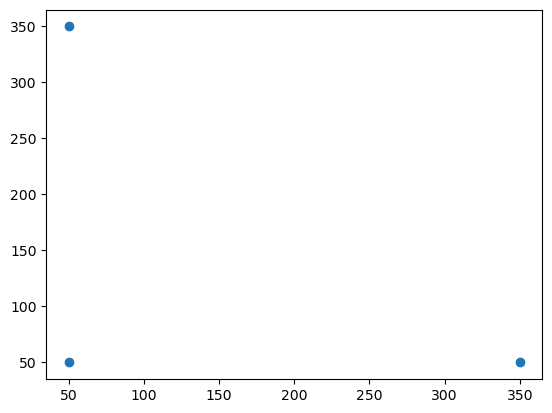

In [153]:
# 아핀 변환
# 3개 점을 이용한 변환

src_pts = np.float32([
    [50,50],
    [350,50],
    [50,350]
])

plt.scatter(src_pts[:,0],src_pts[:,1])
plt.show()

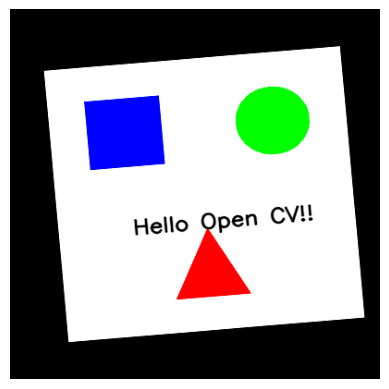

In [158]:
# 목표 위치의 3개 점 지정 (변환 후 위치))
dst_pts = np.float32([
    [80,100],   # 첫번째 점 이동 [50,50] >> [80,100] 오른쪽,아래 이동
    [320, 80],  # 두번째 점 이동 [350, 50] >> [320, 80] 왼쪽 아래 이동
    [100, 320]   # 세번째 점 이동 [50, 350] >> [100, 320] 오른쪽 위 이동
])

affine_matrix = cv2.getAffineTransform(
    src_pts,
    dst_pts
)

affine_result = cv2.warpAffine(
    sample_img_rgb,
    affine_matrix,
    (width,height)
)
plt.imshow(affine_result)
plt.axis('off')
plt.show()

In [161]:
original_with_pts = sample_img_rgb.copy()
colors = [(255,0,0),(0,255,0),(0,0,255)]
for i, pt in enumerate(src_pts):
    cv2.circle(
        original_with_pts,
        tuple(map(int, pt)),
        5,
        colors[i],
        -1
    )

affine_with_pts = affine_result.copy()

for i, pt in enumerate(dst_pts):
    cv2.circle(
        affine_with_pts,
        tuple(map(int, pt)),
        5,
        colors[i],
        -1
    )

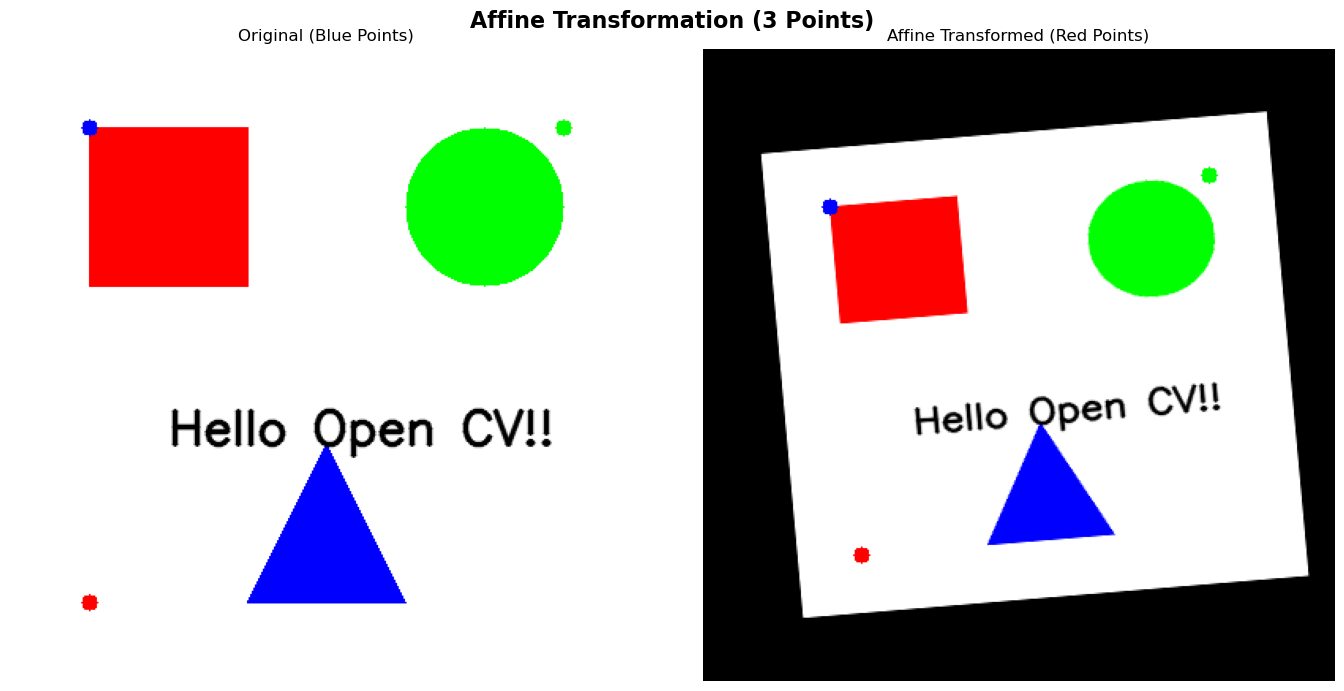

In [162]:

fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 1행 2열 서브플롯
fig.suptitle('Affine Transformation (3 Points)', fontsize=16, fontweight='bold')


# 원본 (파란 점)
axes[0].imshow(cv2.cvtColor(original_with_pts, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original (Blue Points)', fontsize=12)
axes[0].axis('off')


# 변환 결과 (빨간 점)
axes[1].imshow(cv2.cvtColor(affine_with_pts, cv2.COLOR_BGR2RGB))
axes[1].set_title('Affine Transformed (Red Points)', fontsize=12)
axes[1].axis('off')


plt.tight_layout()
plt.show()


In [ ]:
# 수동으로 affine 변환 행렬 만들기
# 행렬 구조 [[a,b,tx],[c,d,ty]]
# [[a,b],[c,d]] 이미지 변환
# tx,ty: 이동

translate_matrix = np.float32([
    [1, 0, 50],
    [0, 1, 30]
])

translated = cv2.warpAffine(
    sample_img_rgb,
    translate_matrix, # 2x3 변환 행렬
    (int(width*1.2), int(height*1.2))
)

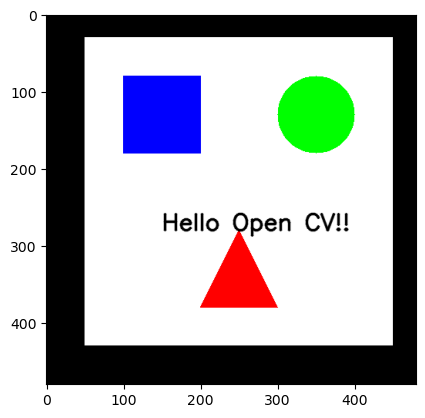

In [168]:
plt.imshow(translated)

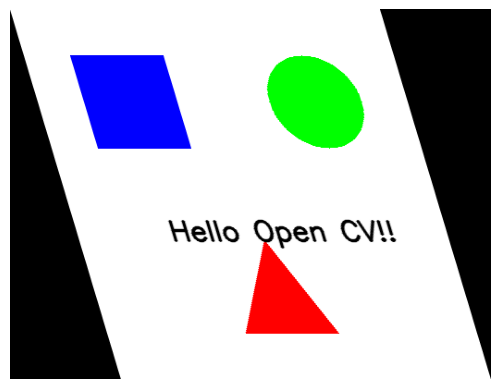

In [175]:
# 2) 수평 기울이기(Hor)

shear_x_matrix = np.float32([
    [1, 0.3, 0],
    [0, 1, 0]
])

sheared_x = cv2.warpAffine(sample_img_rgb,shear_x_matrix,(int(width*1.3),int(height)))
plt.imshow(sheared_x)
plt.axis('off')
plt.show()

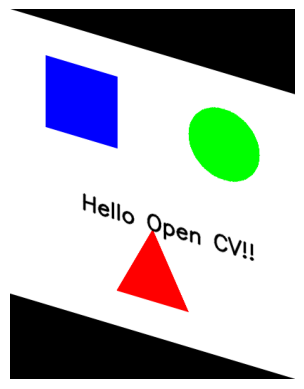

In [ ]:
# 3) 수직 기울이기

shear_y_matrix = np.float32([
    [1, 0, 0],
    [0.3, 1, 0]
])

sheared_y = cv2.warpAffine(sample_img_rgb,shear_y_matrix,(int(width),int(height*1.3)))
plt.imshow(sheared_y)
plt.axis('off')
plt.show()

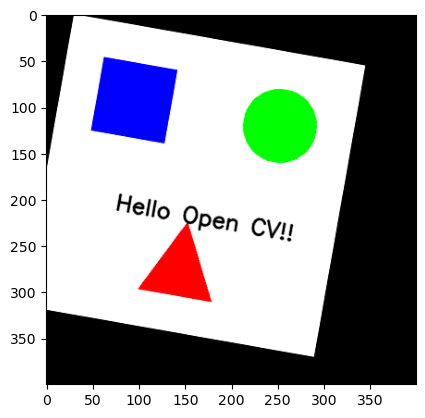

In [188]:
# 복합 변환(회전+크기+이동)
rad = np.radians(10)
scale = 0.8
rotate_matrix = np.float32([
    [np.cos(rad), -np.sin(rad), 30],
    [np.sin(rad), np.cos(rad), 0]
])
rotate_matrix[:,:2] = rotate_matrix[:,:2]*scale
complex_transformed = cv2.warpAffine(sample_img_rgb,rotate_matrix,(width,height))
plt.imshow(complex_transformed)

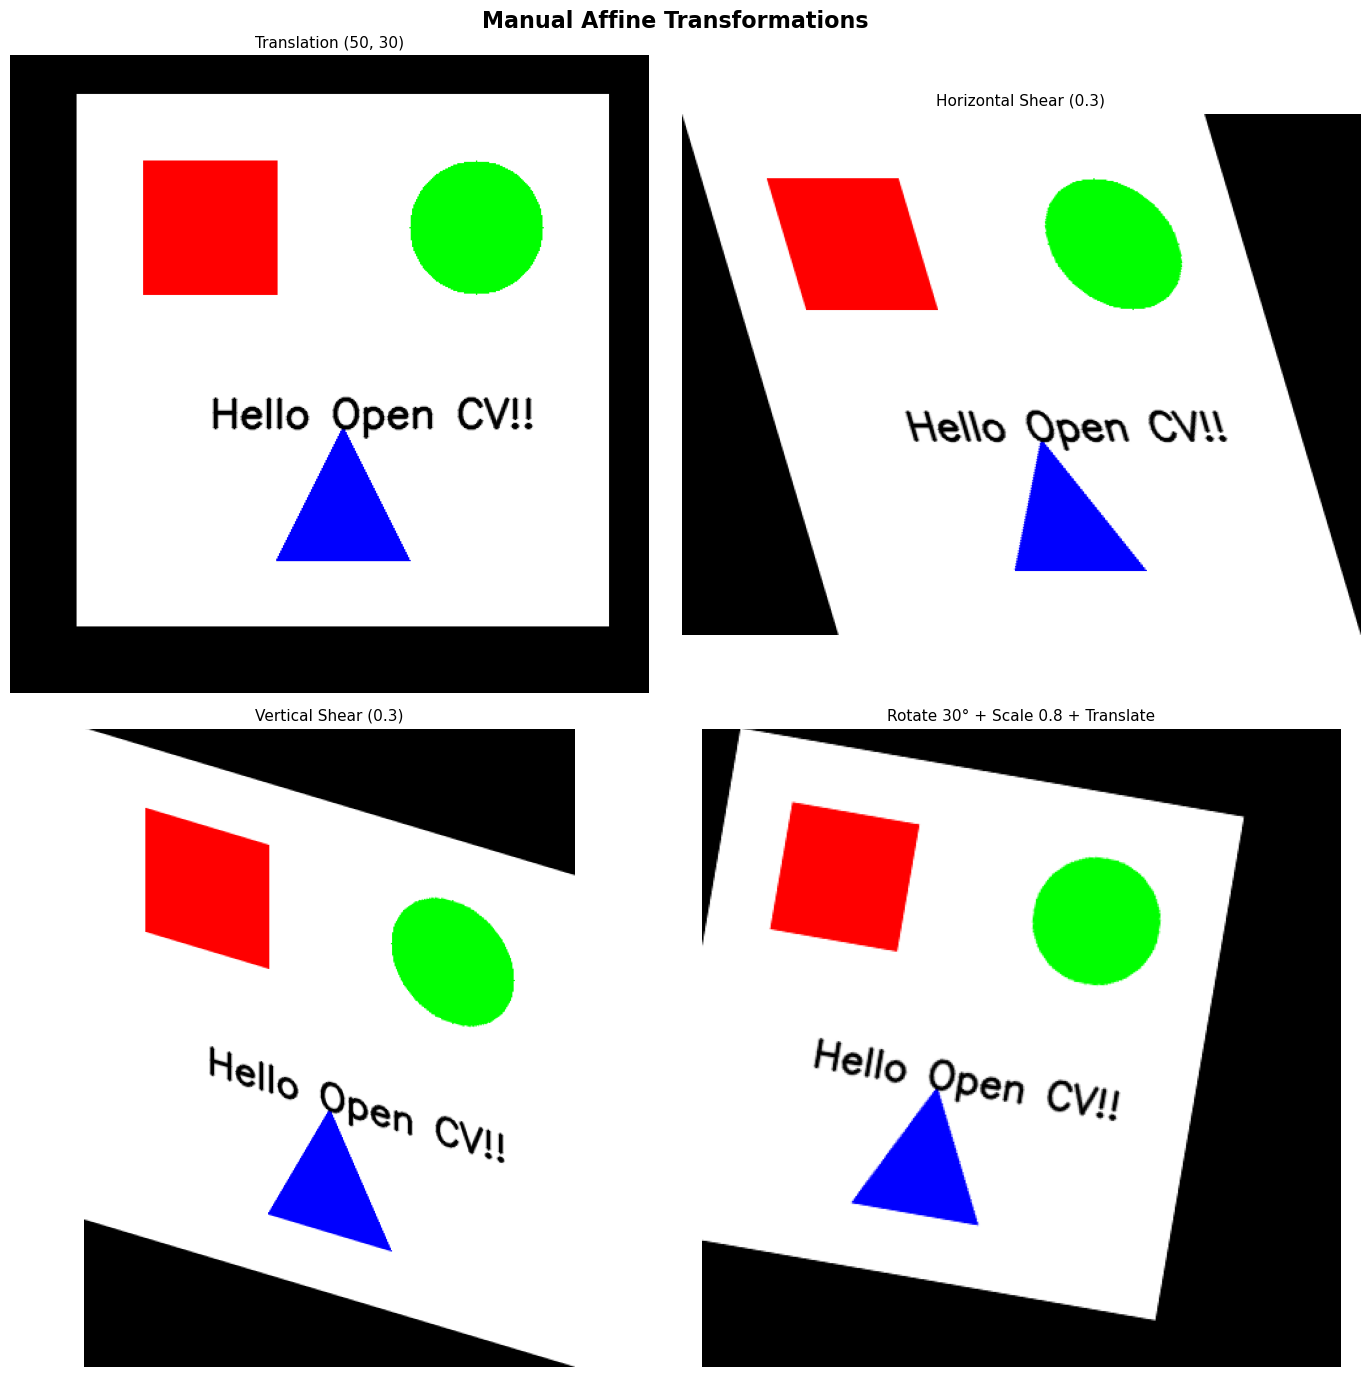

In [184]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
fig.suptitle('Manual Affine Transformations', fontsize=16, fontweight='bold')


# 변환 결과들
affine_results = [translated, sheared_x, sheared_y, complex_transformed]
affine_titles = [
    'Translation (50, 30)',  # 이동
    'Horizontal Shear (0.3)',  # 수평 기울임
    'Vertical Shear (0.3)',  # 수직 기울임
    'Rotate 30° + Scale 0.8 + Translate'  # 복합 변환
]


# 각 subplot에 이미지 표시
for ax, img, title in zip(axes.flat, affine_results, affine_titles):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(title, fontsize=11)
    ax.axis('off')


plt.tight_layout()
plt.show()


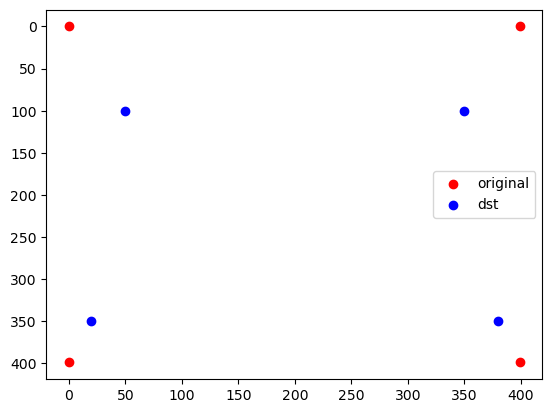

In [ ]:
# Perspective 변환: 4개의 점을 활용, 원근 변환
# 비스듬히 찍힌 사진을 정면으로 보정할 때 사용

# 원본 이미지의 4개 꼭지점 (사각형)

src_pts_persp = np.float32([
    [0, 0],           # 왼쪽 위
    [width-1, 0],     # 오른쪽 위
    [width-1, height-1],  # 오른쪽 아래
    [0, height-1]     # 왼쪽 아래
])


# 목표 위치 4개 점 (사다리꼴 모양으로 변환)
dst_pts_persp = np.float32([
    [50, 100],        # 왼쪽 위 → 오른쪽+아래 이동
    [width-50, 100],  # 오른쪽 위 → 왼쪽+아래 이동
    [width-20, height-50],  # 오른쪽 아래 → 왼쪽+위 이동
    [20, height-50]   # 왼쪽 아래 → 오른쪽+위 이동
])

plt.scatter(src_pts_persp[:,0],src_pts_persp[:,1],c='red',label='original')
plt.scatter(dst_pts_persp[:,0],dst_pts_persp[:,1],c='blue',label='dst')
plt.legend()
plt.gca().invert_yaxis() # y축 방향 뒤집기
plt.show()

In [195]:
perspective_matrix = cv2.getPerspectiveTransform(
    src_pts_persp,
    dst_pts_persp
)
perspective_matrix

array([[ 7.51879699e-01, -8.35421888e-02,  5.00000000e+01],
       [ 0.00000000e+00,  4.80367586e-01,  1.00000000e+02],
       [ 0.00000000e+00, -4.17710944e-04,  1.00000000e+00]])

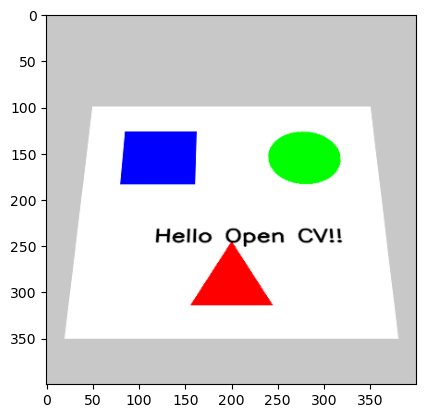

In [196]:
perspective_result = cv2.warpPerspective(
    sample_img_rgb,
    perspective_matrix, # 3x3 변환 행렬
    (width,height),
    borderValue=(200,200,200)
)
plt.imshow(perspective_result)
plt.show()

array([409.,  10.])

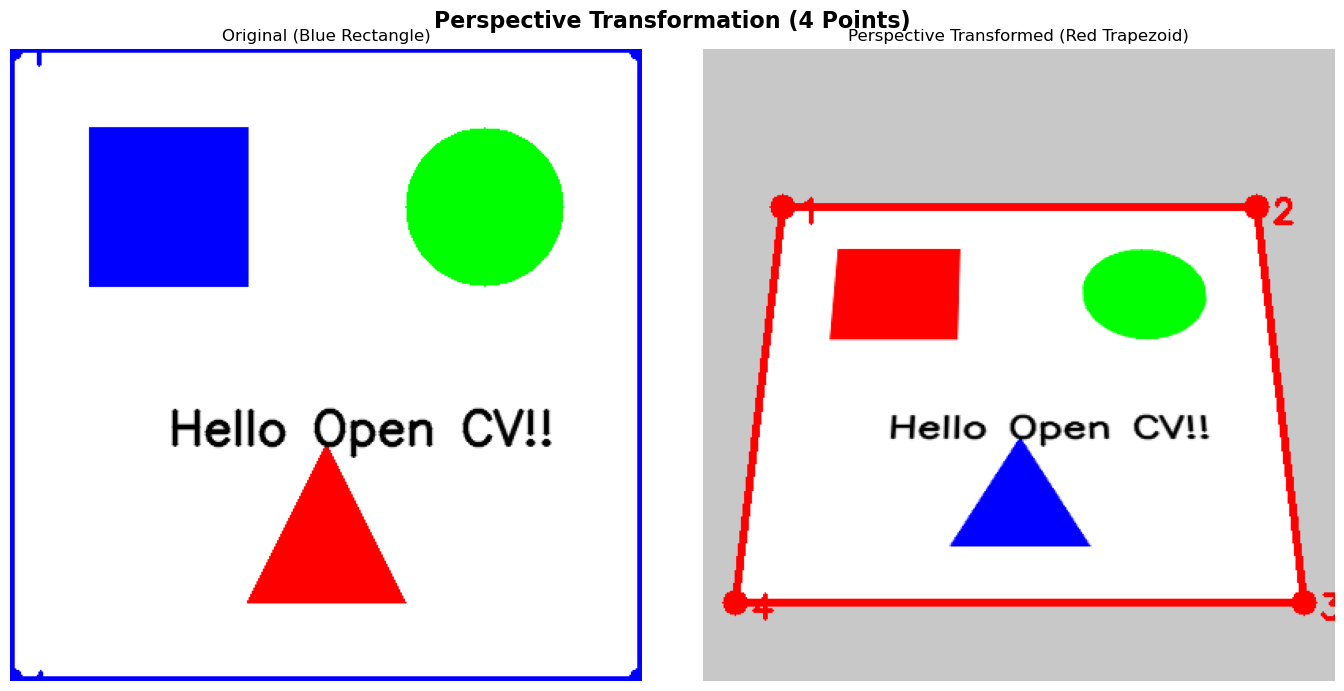

In [ ]:
# 시각화: 원본과 목표 점들을 선으로 연결
original_persp = sample_img.copy()
perspective_persp = perspective_result.copy()


# 원본 이미지에 점과 선 그리기
for i, pt in enumerate(src_pts_persp):
    # 점 그리기
    cv2.circle(
        original_persp,
        tuple(pt.astype(int)),
        8,
        (255, 0, 0),  # 파란색
        -1
    )
    # 점 번호 표시
    cv2.putText(
        original_persp,
        str(i+1),
        tuple((pt + 10).astype(int)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7, # 폰트 사이즈
        (255, 0, 0),
        2 # 두께
    )


# 사각형 테두리 그리기
cv2.polylines(
    original_persp,
    [src_pts_persp.astype(int)],  # 점들을 int로 변환
    True,  # 닫힌 도형
    (255, 0, 0),  # 파란색
    3  # 선 두께
)


# 변환된 이미지에 점과 선 그리기
for i, pt in enumerate(dst_pts_persp):
    cv2.circle(
        perspective_persp,
        tuple(pt.astype(int)),
        8,
        (0, 0, 255),  # 빨간색
        -1
    )
    cv2.putText(
        perspective_persp,
        str(i+1),
        tuple((pt + [10, 10]).astype(int)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (0, 0, 255),
        2
    )


cv2.polylines(
    perspective_persp,
    [dst_pts_persp.astype(int)],
    True,
    (0, 0, 255),  # 빨간색
    3
)


# 결과 표시
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Perspective Transformation (4 Points)', fontsize=16, fontweight='bold')


# 원본 (파란색 사각형)
axes[0].imshow(cv2.cvtColor(original_persp, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original (Blue Rectangle)', fontsize=12)
axes[0].axis('off')


# 변환 결과 (빨간색 사다리꼴)
axes[1].imshow(cv2.cvtColor(perspective_persp, cv2.COLOR_BGR2RGB))
axes[1].set_title('Perspective Transformed (Red Trapezoid)', fontsize=12)
axes[1].axis('off')


plt.tight_layout()
plt.show()


실전예제-ROKEY_7 DOC READER

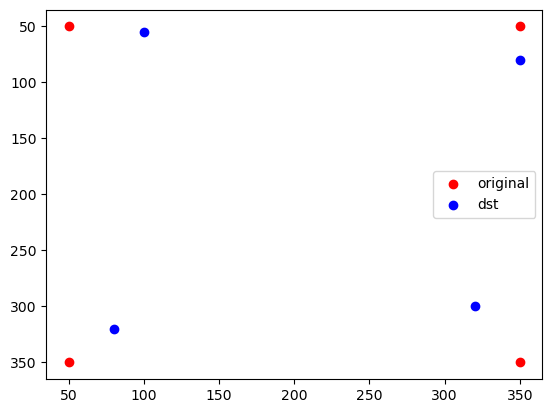

In [208]:
# 정면을 비스듬하게
src = np.float32([
    [50,50],
    [width-50,50],
    [width-50, height-50],
    [50,height-50]
])

dst_skew = np.float32([
    [100,55],
    [width-50,80],
    [width-80, height-100],
    [80,height-80]
])
plt.scatter(src[:,0],src[:,1],c='red',label='original')
plt.scatter(dst_skew[:,0],dst_skew[:,1],c='blue',label='dst')
plt.legend()
plt.gca().invert_yaxis() # y축 방향 뒤집기
plt.show()

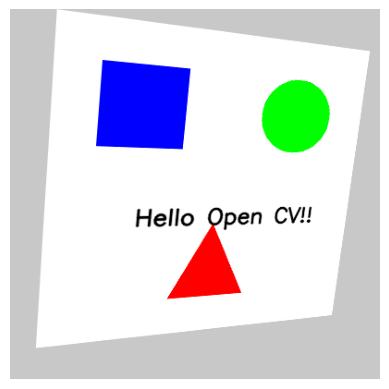

In [209]:
skew_mat = cv2.getPerspectiveTransform(src, dst_skew)
skew_doc = cv2.warpPerspective(sample_img_rgb, skew_mat, (width,height), borderValue=(200,200,200))
plt.imshow(skew_doc)
plt.axis('off')
plt.show()

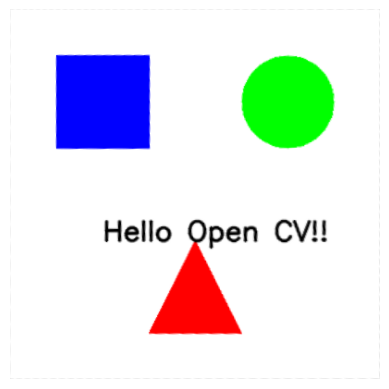

In [212]:
correct_mat = cv2.getPerspectiveTransform(dst_skew,src)
correct_doc = cv2.warpPerspective(skew_doc, correct_mat, (width,height), borderValue=(200,200,200))
plt.imshow(correct_doc)
plt.axis('off')
plt.show()

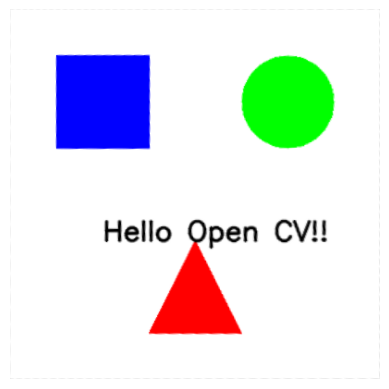

In [213]:
correct_doc = cv2.warpPerspective(skew_doc, np.linalg.inv(skew_mat), (width,height), borderValue=(200,200,200))
plt.imshow(correct_doc)
plt.axis('off')
plt.show()

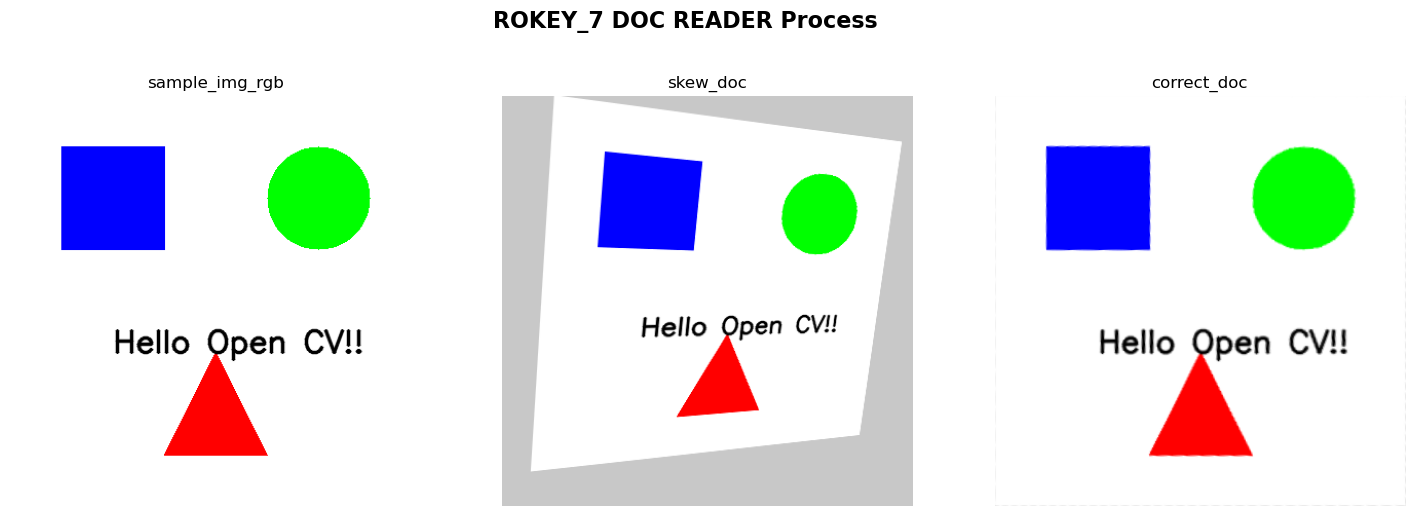

In [215]:
fig, axes = plt.subplots(1,3,figsize=(18,6))
fig.suptitle('ROKEY_7 DOC READER Process', fontsize=16, fontweight='bold')

axes[0].imshow(sample_img_rgb)
axes[0].set_title('sample_img_rgb',fontsize=12)
axes[0].axis('off')
axes[1].imshow(skew_doc)
axes[1].set_title('skew_doc',fontsize=12)
axes[1].axis('off')
axes[2].imshow(correct_doc)
axes[2].set_title('correct_doc',fontsize=12)
axes[2].axis('off')
plt.show()

In [ ]:
A4_RATE = 1.414
a4_width = 100
a4_height = a4_width*A4_RATE
origin_path = ''
input_image = cv2.imread(origin_path)
src_pts = np.float32([
    [0,0],
    [a4_width, 0],
    [a4_width,a4_height],
    [0,a4_height]
])
input_image_pts = None
cv2.approxPolyDP()
cv2.findContours()

In [ ]:
return_mat = cv2.getPerspectiveTransform(input_image_pts,src_pts)
skew_doc = cv2.warpPerspective(sample_img_rgb, skew_mat, (a4_width,a4_height), borderValue=(200,200,200))
plt.imshow(skew_doc)
plt.axis('off')
plt.show()